##Clasificación de variables

Random Forest: Clasificación de vinos

Escenario: queremos clasificar vinos en 3 categorías a partir de sus características químicas (ej. alcohol, acidez, fenoles).

Objetivo: entrenar un Random Forest Classifier y evaluar su rendimiento en test. Además, identificar qué variables químicas son más importantes para la clasificación.

Accuracy: 1.0

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



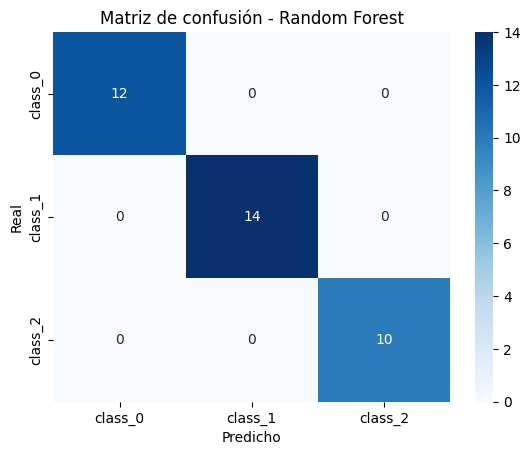

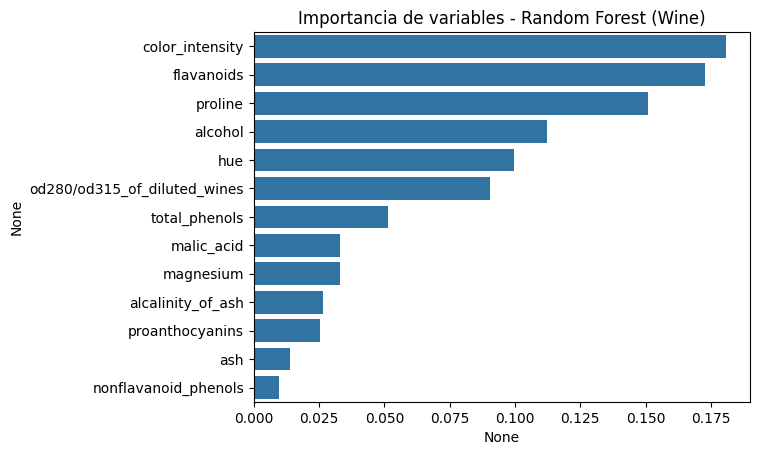

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=wine.target_names,
            yticklabels=wine.target_names)
plt.title("Matriz de confusión - Random Forest")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# Importancia de variables
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=importances, y=importances.index)
plt.title("Importancia de variables - Random Forest (Wine)")
plt.show()


El Random Forest clasificó los vinos con precisión perfecta en test y revela que el color, los flavonoides y la concentración de prolina son las variables más determinantes para distinguir las clases.